# Measurements in Quantum Computing

The field of estimating the quantum state of qubits is usually referred to as quantum tomography. It includes many sophisticated ways of estimating the state with the least error. In this notebook we will briefly look into these errors.

One can encode classical data to qubits using less bits. However, one should also consider if all of the information is readily available to read-out. In quantum systems, result of a measurement only yields one of the possible states. Therefore, one needs to consider methods to recover the state fully.

The most straightforward way of recovering the state is having multiple measurements and averaging the outcomes. If N is the number of measurements, one can express the probability in this case as;

$$ \hat{p} = \bar{p} = \sum_{i=1}^{N} y_i $$ 


Then, one can define a *confidence interval* for the observations as: $[p-\epsilon,p+\epsilon]$. Let's do a quantum coin flipping experiment and observe the change of interval.

In [1]:
# imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Let's define a circuit that takes number of executions as input and returns the observations.
def quantum_coin_flip(shots=1000):
    qreg     =  QuantumRegister(1)   
    creg     = ClassicalRegister(1) 
    qcircuit = QuantumCircuit(qreg,creg)
    qcircuit.h(qreg)
    qcircuit.measure(qreg,creg)
    job      = execute(qcircuit,Aer.get_backend('qasm_simulator'),shots=shots)
    counts   = job.result().get_counts(qcircuit)
    return counts

# Let's also define a function that calculates the error bars
def error(counts):
    error0 = abs(0.5 - counts['0']/(counts['0']+counts['1']))
    error1 = abs(0.5 - counts['1']/(counts['0']+counts['1']))
    return max(error0,error1)

Now, we can test the circuit for multiple measurements.

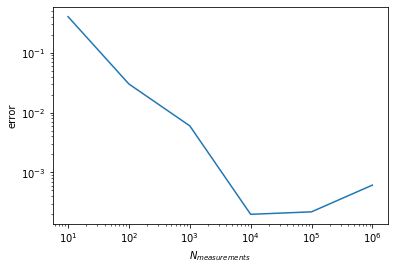

In [3]:
x = [1e+1,1e+2,1e+3,1e+4,1e+5,1e+6]
p = []
for shots in x:
    counts = quantum_coin_flip(shots=shots)
    p.append(error(counts))

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$N_{measurements}$')
plt.ylabel('error')
plt.plot(x,p);

Notice that how the error decreases as *N* grows. In fact the error bars scale with $\mathcal{O}(1/\sqrt{N})$. Therefore, when recovering a quantum state fully, the number of measurements that is needed depends on the required precision. And the number of measurements needed scales with $\mathcal{O}(\epsilon^{-2})$.

Also notice that the above plot is a simulation and not the exact result. Therefore, it is easy to get unwanted results when working with small N.

For further reading readers can refer to Chapter 5.1.3 from Schuld's Book.

References:

1. [Schuld, Maria, Petruccione, Francesco. Supervised Learning with Quantum Computers](https://www.springer.com/gp/book/9783319964232)